In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns



In [2]:
#create dataframe from the csv file
df=pd.read_csv("sfpd_dispatch_data_subset.csv")

In [3]:
df.received_timestamp=pd.to_datetime(df.received_timestamp)
df.on_scene_timestamp=pd.to_datetime(df.on_scene_timestamp)

In [4]:
times= pd.DataFrame(df['on_scene_timestamp']-df['received_timestamp'])   #find timedelta

In [5]:
times['unit_type']= (df['unit_type'])

In [6]:
times.head()

0 unit_type
0 00:17:26     MEDIC
1 00:13:57     MEDIC
2 00:05:41    ENGINE
3 00:04:02    ENGINE
4 00:06:07     CHIEF

In [7]:
times['minutes'] = (times[0].dt.total_seconds()//60) #convert to minutes


In [8]:
times.dropna(inplace=True) #remove nan values
times.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8085 entries, 0 to 9999
Data columns (total 3 columns):
0            8085 non-null timedelta64[ns]
unit_type    8085 non-null object
minutes      8085 non-null float64
dtypes: float64(1), object(1), timedelta64[ns](1)
memory usage: 252.7+ KB


In [9]:
avg_times=times.groupby('unit_type', as_index=False)['minutes'].mean() #group to find mean

In [10]:
avg_times.set_index('unit_type')

minutes
unit_type                
CHIEF            9.538462
ENGINE           7.534033
INVESTIGATION   26.181818
MEDIC           11.225997
PRIVATE         11.516161
RESCUE CAPTAIN  12.855491
RESCUE SQUAD     6.675676
SUPPORT         23.300000
TRUCK            6.894904

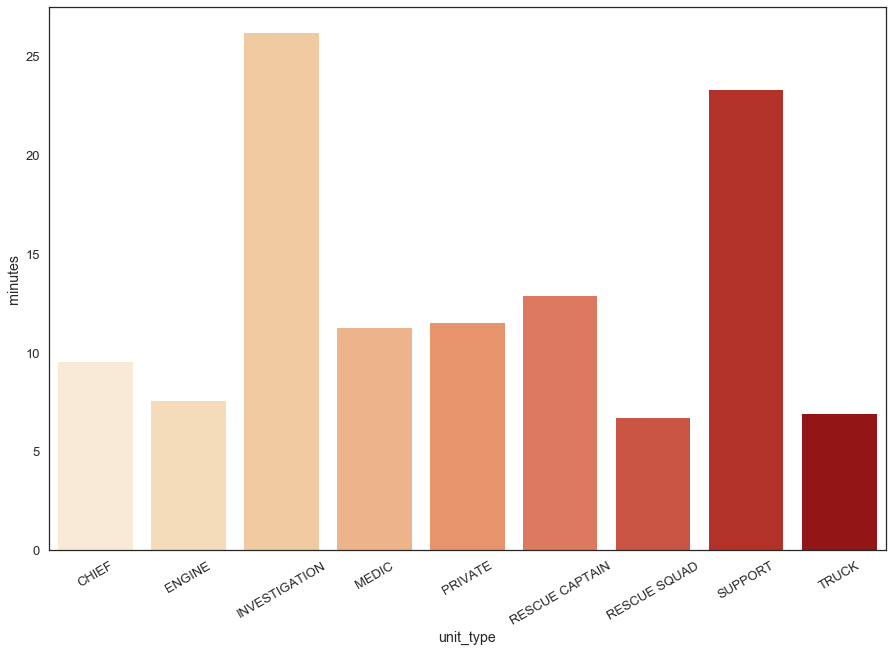

In [11]:
plt.rcParams["xtick.labelsize"] = 1
sns.set(style="white", context="talk")
x=avg_times['unit_type']
y=avg_times['minutes']
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
g=sns.barplot(x, y, palette="OrRd" )
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.show()
